**Exercise 1**

**A**

In [26]:
import numpy as np
from scipy import linalg
def ionize(T):
    T = T / (1e+4)
    CH = (5.8e-9)*(T**(1/2))*np.exp(-15.78/T)
    RHt = (4.13e-13)*T**(-.7131 - .115*np.log(T))
    CHe = (2.8e-9)*(T**(1/2))*np.exp(-28.54/T)
    RHet = (1.54e-13)*(T**-.486)+(2.72e-13)*T**-.789
    CHet = (4.3e-10)*(T**(1/2))*np.exp(-63.13/T)
    RHett = (1.65e-12)*(T/4)**(-.7131-.115*np.log(T/4))
    left = np.array([[CH+RHt,0,0],[0,CHe+RHet,CHe],[0,CHet,-RHett]])
    right = np.array([[CH],[CHe],[0]])
    x = linalg.solve(left,right)
    return x.transpose()
ionize(10e+4)






array([[0.99998852, 0.24024794, 0.75970755]])

**B**

In [28]:
a = np.logspace(3,5,num=100)*3
XHett = np.zeros(100)
XHet = np.zeros(100)
XHt = np.zeros(100)
for i in range(len(a)):
    x = ionize(a[i])
    XHt[i]=x[0][0]
    XHet[i]=x[0][1]
    XHett[i]=x[0][2]

print(XHett)


[1.50017933e-128 1.75677369e-122 1.09480672e-116 3.73653019e-111
 7.17799272e-106 7.96699350e-101 5.23817816e-096 2.08932145e-091
 5.17182834e-087 8.11937517e-083 8.25350063e-079 5.54088703e-075
 2.50347940e-071 7.75100189e-068 1.67297922e-064 2.55901251e-061
 2.81779644e-058 2.26724787e-055 1.35220367e-052 6.05980438e-050
 2.06727900e-047 5.43572339e-045 1.11476157e-042 1.80338154e-040
 2.32629860e-038 2.41765045e-036 2.04430754e-034 1.41972359e-032
 8.17073152e-031 3.93038718e-029 1.59321961e-027 5.48490491e-026
 1.61565512e-024 4.10109158e-023 9.03159389e-022 1.73679231e-020
 2.93438136e-019 4.38120979e-018 5.81226195e-017 6.88559297e-016
 7.31635151e-015 6.99748597e-014 6.03754613e-013 4.70108846e-012
 3.29578504e-011 2.06906713e-010 1.15371192e-009 5.66506883e-009
 2.43801796e-008 9.22416713e-008 3.10371348e-007 9.44358269e-007
 2.64354237e-006 6.90978232e-006 1.70581980e-005 4.01071402e-005
 9.03535454e-005 1.95888426e-004 4.10048505e-004 8.30837796e-004
 1.63268626e-003 3.116373

**C**

In [44]:
from scipy.interpolate import interp1d as imp1d
XHet1 = XHet[0:int(np.argmax(XHet))]
XHet2 = XHet[int(np.argmax(XHet)):100]

a1 = a[0:int(np.argmax(XHet))]
a2 = a[int(np.argmax(XHet)):100]
fHetinterp1 = imp1d(a1,XHet1)
fHetinterp2 = imp1d(a2,XHet2)
fHtinterp = imp1d(a,XHt)
fHettinterp = imp1d(a,XHett)

yHetinterp = fHetinterp1(a1)
yHetinterp = np.append(yHetinterp,fHetinterp2(a2))


**D**

The 50% temp for H+ is : 15612.665891386674
The 1st 50% temp for He+ is : 28515.443328054036
The 2nd 50% temp for He+ is : 86919.95902972616
The 50% temp for He++ is : 86926.8665710434


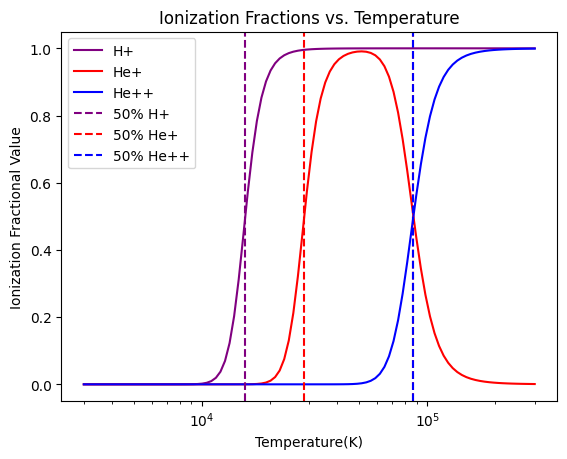

In [84]:
import matplotlib.pyplot as plt
plt.plot(a,fHtinterp(a),'purple',label = "H+")
plt.plot(a,yHetinterp,'red', label = "He+")
plt.plot(a,fHettinterp(a),'blue',label = "He++")

Ht = imp1d(XHt,a)(.5)
Het1 = imp1d(XHet1,a1)(.5)
Het2 = imp1d(XHet2,a2)(.5)
Hett = imp1d(XHett,a)(.5)


print("The 50% temp for H+ is :",Ht)
print("The 1st 50% temp for He+ is :",Het1)
print("The 2nd 50% temp for He+ is :",Het2)
print("The 50% temp for He++ is :",Hett)

plt.axvline(Ht,ls = '--',label = "50% H+",c='purple')
plt.axvline(Het1,ls = '--',label = "50% He+",c='red')
plt.axvline(Het2,ls = '--',c='red')
plt.axvline(Hett,ls = '--',label = "50% He++",c='blue')

plt.xscale('log')
plt.xlabel("Temperature(K)")
plt.title("Ionization Fractions vs. Temperature")
plt.ylabel("Ionization Fractional Value")
plt.legend()
plt.show()


